<a href="https://colab.research.google.com/github/mohdayazz/Sparks-Foundation/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict the percentage of a student based on the no. of study hours.

# Simple Linear Regression task that involves two variables  hours and score.

Importing the heaader files


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Get the Data


In [ ]:
d = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

#Data Preprocessing

In [ ]:
d.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Data Type of the Column

In [ ]:
d.dtypes

Hours     float64
Scores      int64
dtype: object

#The total no of rows and colums

In [ ]:
d.shape

(25, 2)

#Basic Statistical details

In [ ]:
d.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#Checking of any null value

In [ ]:
d.isnull().sum()

Hours     0
Scores    0
dtype: int64

#Data Visualization

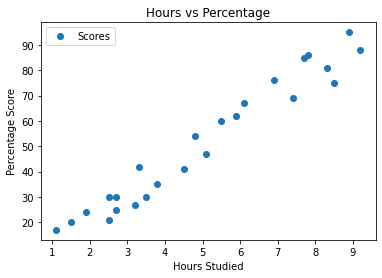

In [ ]:
# Plotting the distribution of scores
d.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


In [16]:
X = d.iloc[:, :-1].values  
y = d.iloc[:, 1].values 

X.reshape(-1,1)
y.reshape(-1,1)

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y)

Select and Train an ML Algorithm

For this task its the linear regression Algorithm

In [18]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression() 

# to tell the algorithm also which data to work on we use the fit function
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

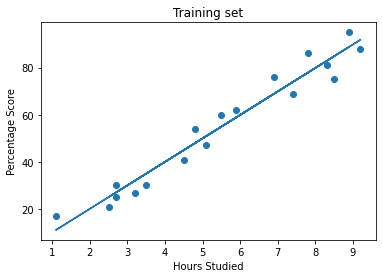

In [19]:
# Visualising the Training dataset 
plt.scatter(X_train,y_train)
plt.title('Training set')  
plt.plot(X_train,lin_reg.predict(X_train))
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

In [20]:
# Accuracy of training set
lin_reg.score(X_train, y_train)

0.954517983748348

Now, finding the equation y = mx + c

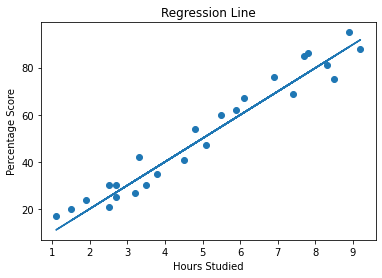

In [23]:
# Plotting the regression line
line = lin_reg.coef_*X + lin_reg.intercept_
plt.scatter(X, y)
plt.title('Regression Line') 
plt.plot(X, line)
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [26]:
print(X_test) # Testing data - In Hours
y_pred = lin_reg.predict(X_test) # Predicting the score

[[1.5]
 [7.7]
 [3.8]
 [1.9]
 [3.3]
 [6.1]
 [2.5]]


In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,15.107183
1,85,76.853174
2,35,38.012954
3,24,19.090795
4,42,33.033438
5,67,60.918725
6,30,25.066214


Now, what will be the score if a student studies 9.25 hours per day ?


In [28]:
hours = float(input('Enter number of hours a student in studying in a day '))

Enter number of hours a student in studying in a day 9.25


In [29]:
# Accuracy of test set
lin_reg.score(X_test, y_test)

0.9234250144358087

In [30]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 5.849060663450735


In [34]:
own_pred = lin_reg.predict([[hours]])
print("Predicted Score = {}".format((own_pred)[0]))

Predicted Score = 92.28967240165107
